In [1]:
library(pROC)
library(randomForest) 

Type 'citation("pROC")' for a citation.


Attaching package: 'pROC'


The following objects are masked from 'package:stats':

    cov, smooth, var


randomForest 4.7-1.1

Type rfNews() to see new features/changes/bug fixes.



In [2]:
## Generate weight and obesity datasets.


## The main point of using the seed is to be able to reproduce a particular sequence of 'random' numbers
set.seed(420) # this will match the results everytime

num.samples <- 100

## genereate 100 random values from a normal distribution with mean 172 and standard deviation 29, then sort them
weight <- sort(rnorm(n=num.samples, mean=172, sd=29))

In [3]:
## Now we will decide if a sample is obese or not. 

## rank(weight) returns 1 for the lightest, 2 for the second lightest, ... and it returns 100 for the heaviest.

## So what we do is generate a random number between 0 and 1. 

## Then we see if that number is less than rank/100.

## So, for the lightest sample, rank = 1.
## This sample will be classified "obese" if we get a random number less than 1/100.

## For the second lightest sample, rank = 2, we get another random number between 0 and 1 
## and classify this sample "obese" if that random number is < 2/100.

## We repeat that process for all 100 samples


obese <- ifelse(test=(runif(n=num.samples) < (rank(weight)/num.samples)), 
  yes=1, no=0)

obese ## print out the contents of "obese" to show us which samples were
      ## classified "obese" with 1, and which samples were classified
      ## "not obese" with 0.

[1] 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 0 0 1 1 0 0 1 0 0 0
 [38] 0 1 1 1 0 0 1 0 0 1 0 0 1 1 1 1 0 0 1 0 0 1 1 1 0 1 1 1 0 1 0 1 1 1 0 0 1
 [75] 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1

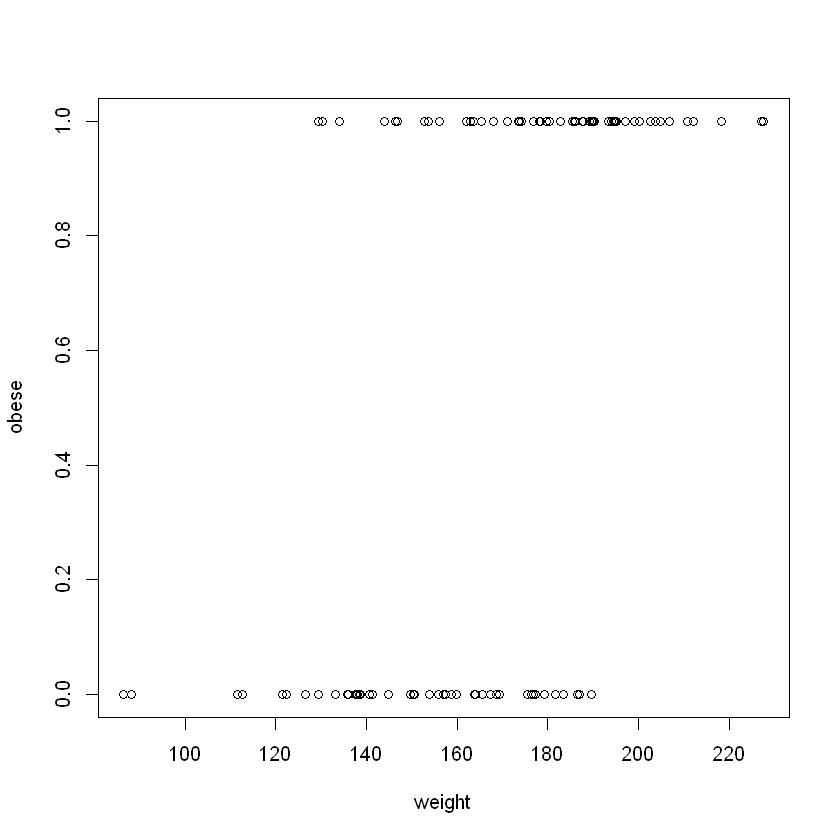

In [4]:
## plot the data

plot(x=weight, y=obese)

In [5]:
## fit a logistic regression to the data...

glm.fit=glm(obese ~ weight, family=binomial)

In [6]:
lines(weight, glm.fit$fitted.values)

ERROR: Error in plot.xy(xy.coords(x, y), type = type, ...): plot.new has not been called yet


Setting levels: control = 0, case = 1

Setting direction: controls < cases




Call:
roc.default(response = obese, predictor = glm.fit$fitted.values,     plot = TRUE)

Data: glm.fit$fitted.values in 45 controls (obese 0) < 55 cases (obese 1).
Area under the curve: 0.8291

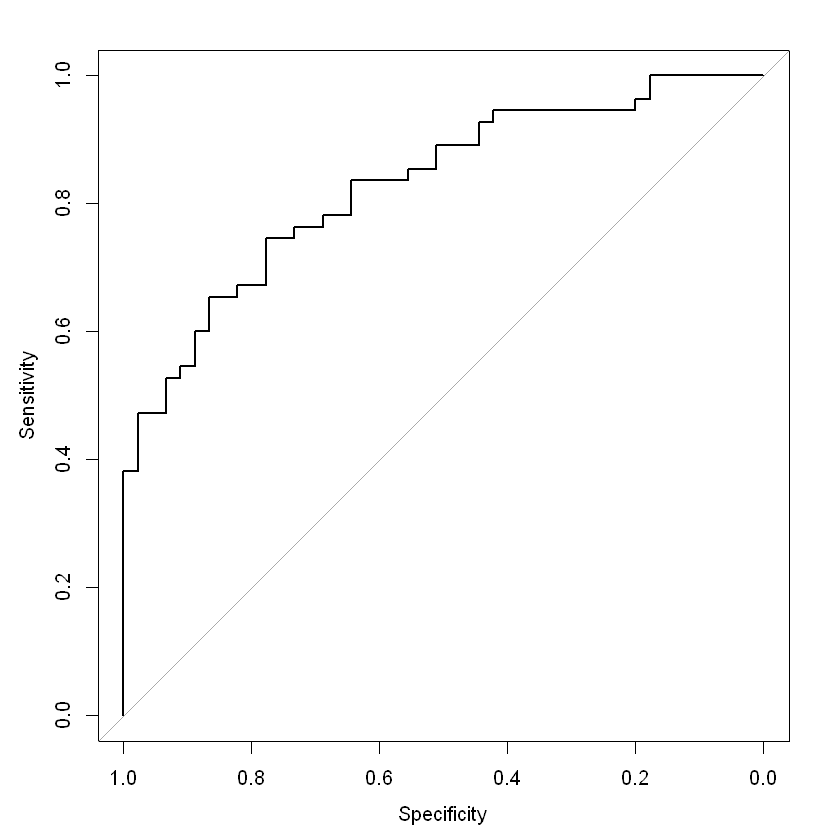

In [7]:
## draw ROC and AUC using pROC

## NOTE: If By default, the graphs come out looking terrible

## The problem is that ROC graphs should be square, since the x and y axes both go from 0 to 1. 

## So if extra whitespace is added to pad the sides then we can configure it by:

## par(pty = "s") ## pty sets the aspect ratio of the plot region. Two options:
##                "s" - creates a square plotting region
##                "m" - (the default) creates a maximal plotting region

roc(obese, glm.fit$fitted.values, plot=TRUE)

Setting levels: control = 0, case = 1

Setting direction: controls < cases




Call:
roc.default(response = obese, predictor = glm.fit$fitted.values,     plot = TRUE, legacy.axes = TRUE)

Data: glm.fit$fitted.values in 45 controls (obese 0) < 55 cases (obese 1).
Area under the curve: 0.8291

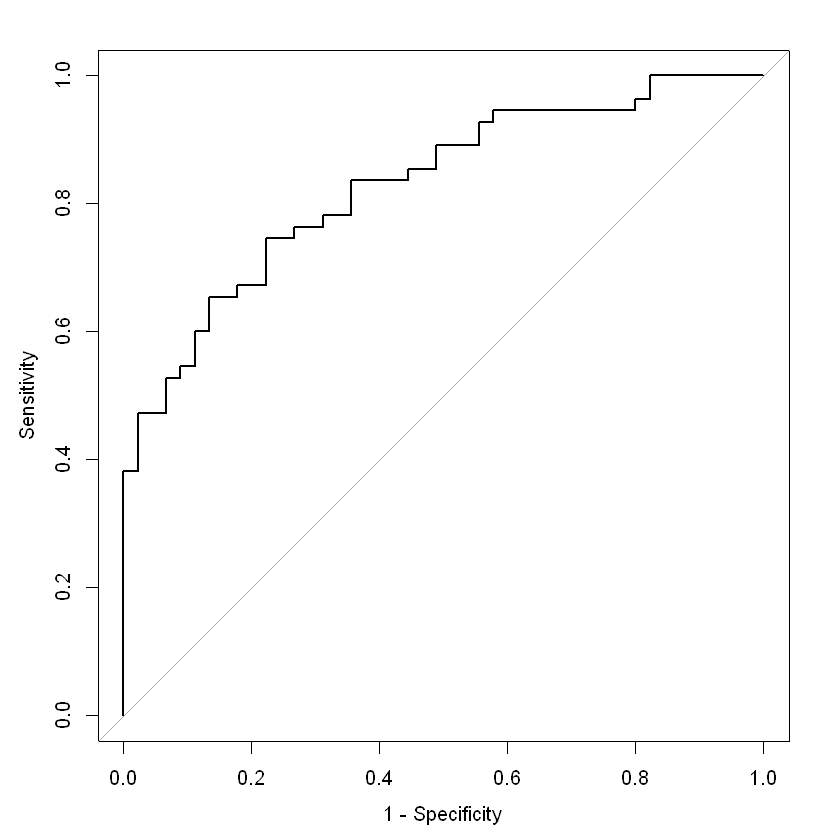

In [8]:
## NOTE: By default, roc() uses specificity on the x-axis and the values range from 1 to 0.
## This makes the graph look like what we would expect, but the x-axis itself might induce a headache. 

## To use 1-specificity (i.e. the False Positive Rate) on the x-axis, set "legacy.axes" to TRUE.

roc(obese, glm.fit$fitted.values, plot=TRUE, legacy.axes=TRUE)

Setting levels: control = 0, case = 1

Setting direction: controls < cases




Call:
roc.default(response = obese, predictor = glm.fit$fitted.values,     percent = TRUE, plot = TRUE, legacy.axes = TRUE, xlab = "False Positive Percentage",     ylab = "True Postive Percentage")

Data: glm.fit$fitted.values in 45 controls (obese 0) < 55 cases (obese 1).
Area under the curve: 82.91%

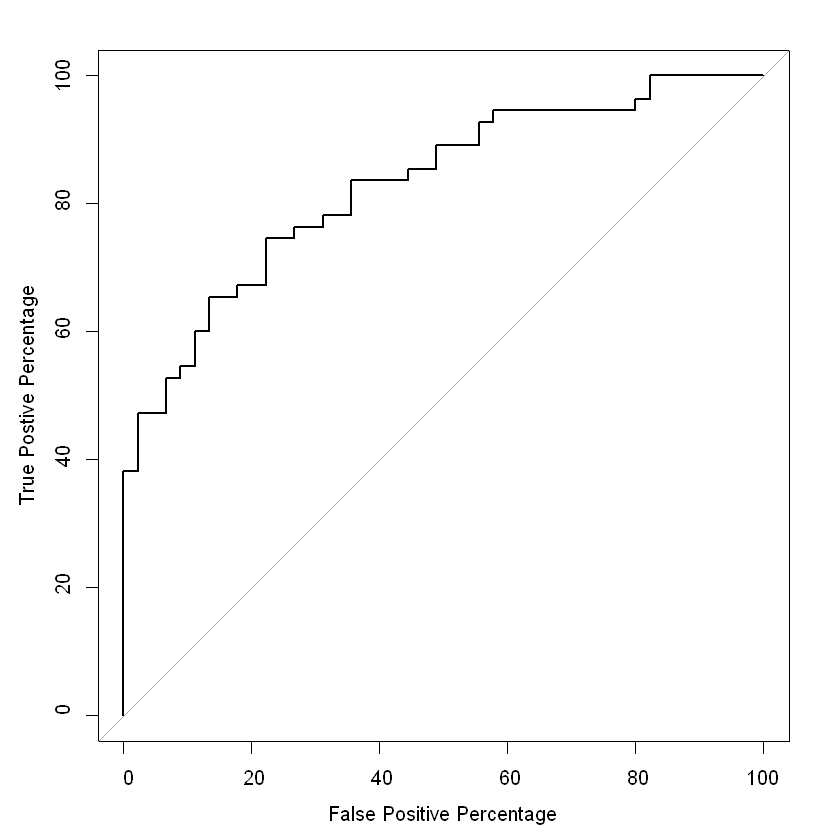

In [9]:
## If you want to rename the x and y axes...

roc(obese, glm.fit$fitted.values, plot=TRUE, legacy.axes=TRUE, percent=TRUE, xlab="False Positive Percentage", ylab="True Postive Percentage")

Setting levels: control = 0, case = 1

Setting direction: controls < cases




Call:
roc.default(response = obese, predictor = glm.fit$fitted.values,     percent = TRUE, plot = TRUE, legacy.axes = TRUE, xlab = "False Positive Percentage",     ylab = "True Postive Percentage", col = "#377eb8", lwd = 4)

Data: glm.fit$fitted.values in 45 controls (obese 0) < 55 cases (obese 1).
Area under the curve: 82.91%

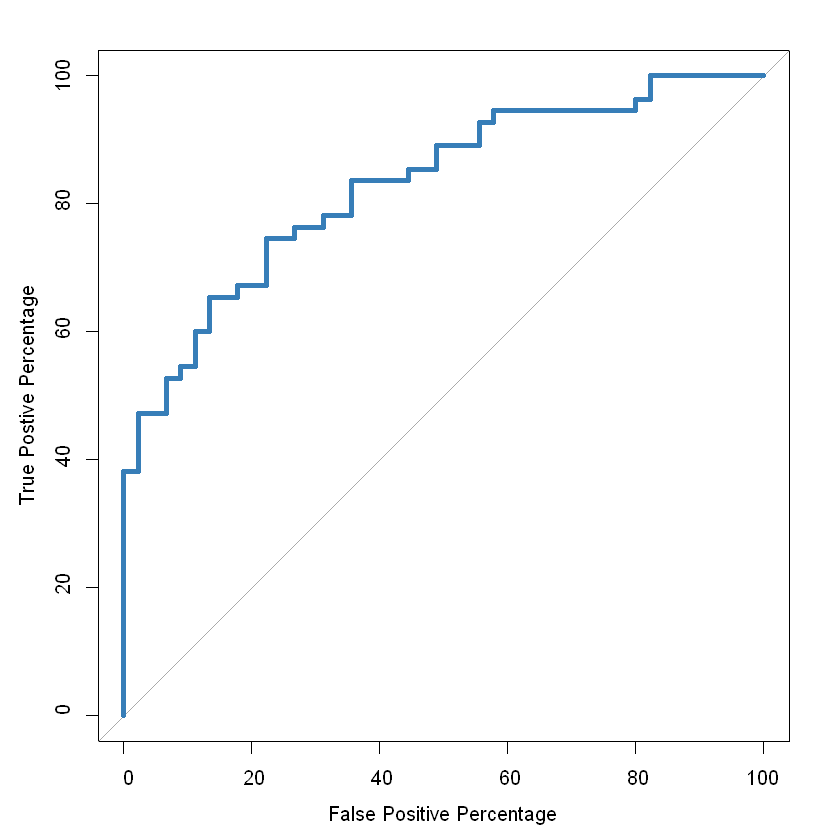

In [10]:
## We can also change the color of the ROC line, and make it wider...

roc(obese, glm.fit$fitted.values, plot=TRUE, legacy.axes=TRUE, percent=TRUE, xlab="False Positive Percentage", ylab="True Postive Percentage", col="#377eb8", lwd=4)

In [11]:
## If we want to find out the optimal threshold we can store the data used to make the ROC graph in a variable...

roc.info <- roc(obese, glm.fit$fitted.values, legacy.axes=TRUE)

Setting levels: control = 0, case = 1

Setting direction: controls < cases



In [12]:
## and then extract just the information that we want from that variable.

roc.df <- data.frame(
  tpp=roc.info$sensitivities*100, ## tpp = true positive percentage
  fpp=(1 - roc.info$specificities)*100, ## fpp = false positive precentage
  thresholds=roc.info$thresholds)

In [13]:
head(roc.df) ## head() will show us the values for the upper right-hand corner of the ROC graph, when the threshold is so low 
             ## (negative infinity) that every single sample is called "obese".
             ## Thus TPP = 100% and FPP = 100%

,tpp,fpp,thresholds
,<dbl>,<dbl>,<dbl>
1,100,100.00000,-Inf
2,100,97.77778,0.01349011
3,100,95.55556,0.03245008
4,100,93.33333,0.05250145
5,100,91.11111,0.07017225
6,100,88.88889,0.08798755


In [14]:
tail(roc.df) ## tail() will show us the values for the lower left-hand corner of the ROC graph, when the threshold is so high (infinity) 
             ## that every single sample is called "not obese". 
             ## Thus, TPP = 0% and FPP = 0%

,tpp,fpp,thresholds
,<dbl>,<dbl>,<dbl>
96,9.090909,0,0.9275222
97,7.272727,0,0.9371857
98,5.454545,0,0.9480358
99,3.636364,0,0.9648800
100,1.818182,0,0.9735257
101,0.000000,0,Inf


In [15]:
## now let's look at the thresholds between TPP 60% and 80%...

roc.df[roc.df$tpp > 60 & roc.df$tpp < 80,]

,tpp,fpp,thresholds
,<dbl>,<dbl>,<dbl>
42,78.18182,35.55556,0.5049310
43,78.18182,33.33333,0.5067116
44,78.18182,31.11111,0.5166680
45,76.36364,31.11111,0.5287933
46,76.36364,28.88889,0.5429351
47,76.36364,26.66667,0.5589494
48,74.54545,26.66667,0.5676342
49,74.54545,24.44444,0.5776086
50,74.54545,22.22222,0.5946054


Setting levels: control = 0, case = 1

Setting direction: controls < cases




Call:
roc.default(response = obese, predictor = glm.fit$fitted.values,     percent = TRUE, plot = TRUE, legacy.axes = TRUE, xlab = "False Positive Percentage",     ylab = "True Postive Percentage", col = "#377eb8", lwd = 4,     print.auc = TRUE)

Data: glm.fit$fitted.values in 45 controls (obese 0) < 55 cases (obese 1).
Area under the curve: 82.91%

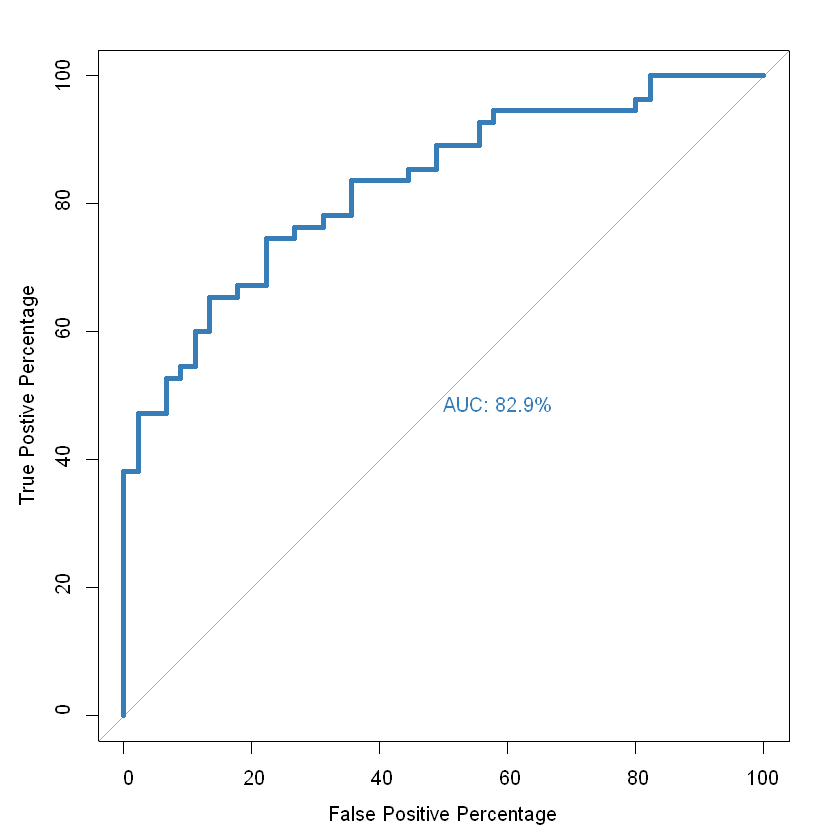

In [16]:
## We can calculate the area under the curve...

roc(obese, glm.fit$fitted.values, plot=TRUE, legacy.axes=TRUE, percent=TRUE, xlab="False Positive Percentage", ylab="True Postive Percentage", col="#377eb8", lwd=4, print.auc=TRUE)

Setting levels: control = 0, case = 1

Setting direction: controls < cases




Call:
roc.default(response = obese, predictor = glm.fit$fitted.values,     percent = TRUE, plot = TRUE, legacy.axes = TRUE, xlab = "False Positive Percentage",     ylab = "True Postive Percentage", col = "#377eb8", lwd = 4,     print.auc = TRUE, print.auc.x = 45, partial.auc = c(100,         90), auc.polygon = TRUE, auc.polygon.col = "#377eb822")

Data: glm.fit$fitted.values in 45 controls (obese 0) < 55 cases (obese 1).
Partial area under the curve (specificity 100%-90%): 4.727%

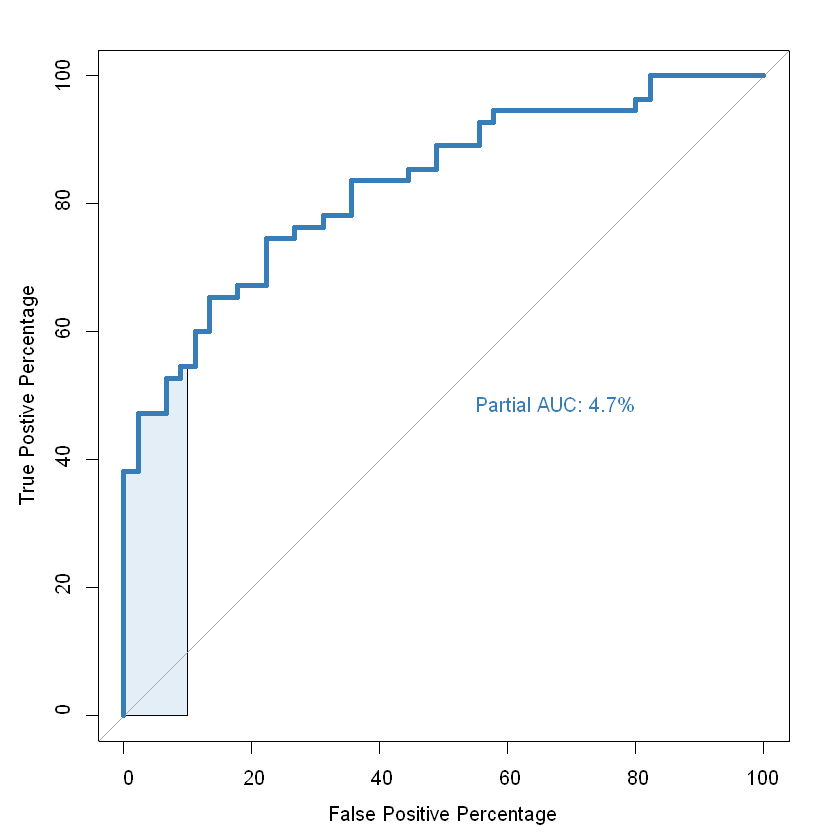

In [17]:
## ...and the partial area under the curve.

roc(obese, glm.fit$fitted.values, plot=TRUE, legacy.axes=TRUE, percent=TRUE, xlab="False Positive Percentage", ylab="True Postive Percentage", col="#377eb8", lwd=4, print.auc=TRUE, print.auc.x=45, partial.auc=c(100, 90), auc.polygon = TRUE, auc.polygon.col = "#377eb822")

In [18]:
## Now let's fit the data with a random forest...

rf.model <- randomForest(factor(obese) ~ weight)

Setting levels: control = 0, case = 1

Setting direction: controls > cases




Call:
roc.default(response = obese, predictor = rf.model$votes[, 1],     percent = TRUE, plot = TRUE, legacy.axes = TRUE, xlab = "False Positive Percentage",     ylab = "True Postive Percentage", col = "#4daf4a", lwd = 4,     print.auc = TRUE)

Data: rf.model$votes[, 1] in 45 controls (obese 0) > 55 cases (obese 1).
Area under the curve: 79.29%

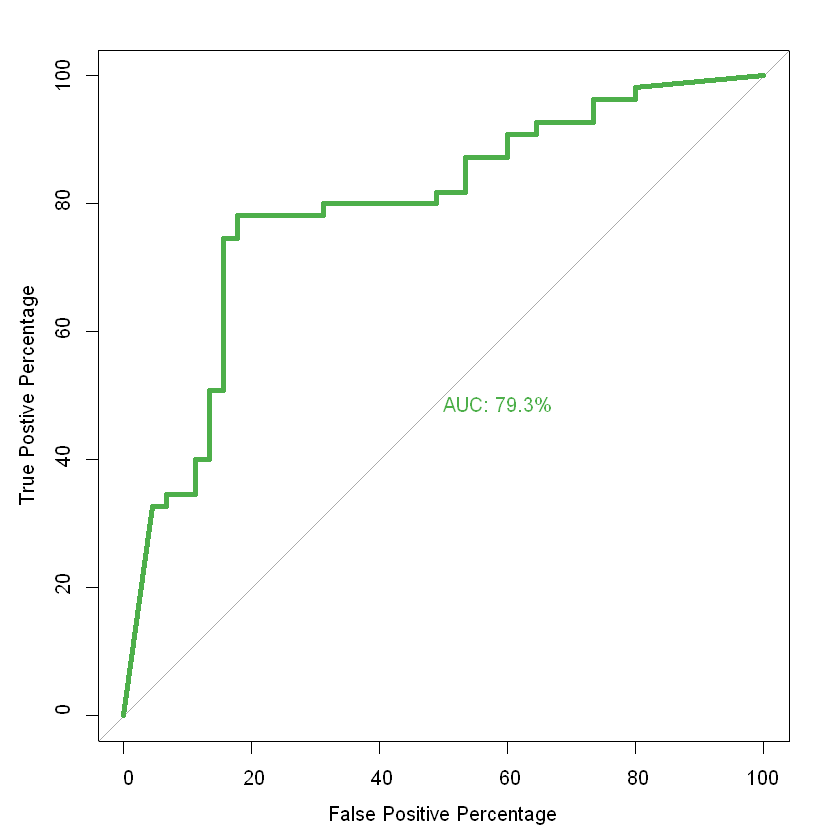

In [19]:
## ROC for random forest

roc(obese, rf.model$votes[,1], plot=TRUE, legacy.axes=TRUE, percent=TRUE, xlab="False Positive Percentage", ylab="True Postive Percentage", col="#4daf4a", lwd=4, print.auc=TRUE)

Setting levels: control = 0, case = 1

Setting direction: controls < cases




Call:
roc.default(response = obese, predictor = glm.fit$fitted.values,     percent = TRUE, plot = TRUE, legacy.axes = TRUE, xlab = "False Positive Percentage",     ylab = "True Postive Percentage", col = "#377eb8", lwd = 4,     print.auc = TRUE)

Data: glm.fit$fitted.values in 45 controls (obese 0) < 55 cases (obese 1).
Area under the curve: 82.91%

Setting levels: control = 0, case = 1

Setting direction: controls > cases



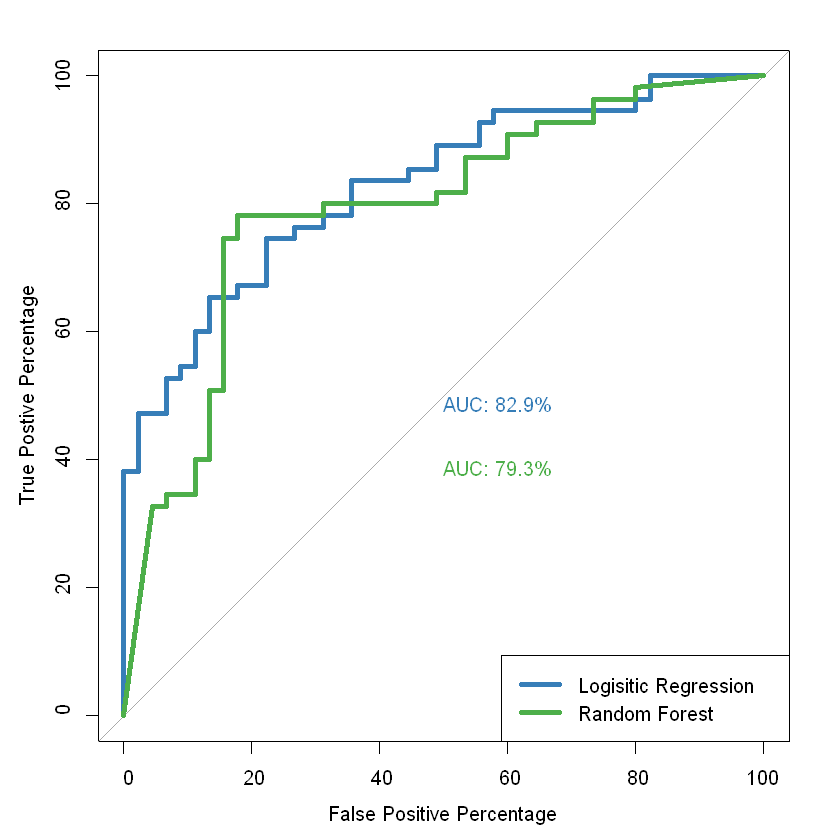

In [20]:
## Now layer logistic regression and random forest ROC graphs..

roc(obese, glm.fit$fitted.values, plot=TRUE, legacy.axes=TRUE, percent=TRUE, xlab="False Positive Percentage", ylab="True Postive Percentage", col="#377eb8", lwd=4, print.auc=TRUE)

plot.roc(obese, rf.model$votes[,1], percent=TRUE, col="#4daf4a", lwd=4, print.auc=TRUE, add=TRUE, print.auc.y=40)

legend("bottomright", legend=c("Logisitic Regression", "Random Forest"), col=c("#377eb8", "#4daf4a"), lwd=4)

In [21]:
## If you have changed the par() earlier,  reset the par() variables.
## par(pty = "m")